In [1]:
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_posts = pd.read_pickle('./picklefiles/posts_typecasted_1.pkl')
df_pposts = df_posts[df_posts['ParentId'] == -1]
def prune_python_tag(tag):
    return tag.replace('<python>', '')
df_pposts['Tags'] = list(map(prune_python_tag, df_pposts['Tags']))

def split_tags(tags):
    return tuple([el.replace('<','').replace('>','') for el in tags.split('><')])
df_pposts['Tags'] = list(map(split_tags, df_pposts['Tags']))

TAGS = df_pposts['Tags']

C:\Users\PC-312\AppData\Local\Temp\ipykernel_8876\3871295981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pposts['Tags'] = list(map(prune_python_tag, df_pposts['Tags']))
C:\Users\PC-312\AppData\Local\Temp\ipykernel_8876\3871295981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pposts['Tags'] = list(map(split_tags, df_pposts['Tags']))


# Apriori

In [4]:
%%capture
! pip install efficient-apriori

In [16]:
# Counting appearances of each item in the tuples
item_counts = Counter()
for items in df_pposts['Tags']:
    item_counts.update(items)

item_counts = dict(sorted(item_counts.items(), key=lambda item: item[1], reverse=True))
del item_counts['']

In [18]:
item_counts_perc = dict()
total_items = sum(item_counts.values())
for (it, count) in item_counts.items():
    item_counts_perc[it] = 100*count / total_items

In [23]:
np.percentile(list(item_counts_perc.values()), 50)

0.00033075919986041963

In [35]:
def plot_items(item_counts, percentage = False, percentile = 50, top = 30, figsize=(10,6)):
    if percentage:
        item_counts_perc = dict()
        total_items = sum(item_counts.values())
        for (it, count) in item_counts.items():
            item_counts_perc[it] = 100*count / total_items
        item_counts = item_counts_perc
    item_counts_top = dict(sorted(item_counts.items(), key=lambda item: item[1], reverse=True)[:top])
    # Creating a horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(list(item_counts_top.keys()), list(item_counts_top.values()), color='skyblue')
    plt.xlabel('% (Count/Total) ')
    plt.ylabel('Items')
    plt.title('Count of Different Appearances of Items')
    plt.show()

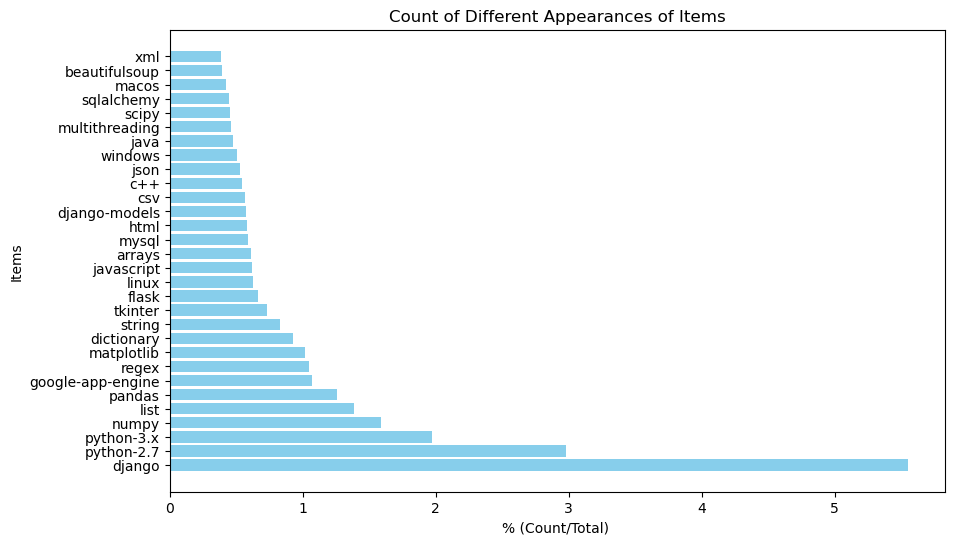

In [36]:
plot_items(item_counts, percentage=True, percentile=50, top = 30)

In [28]:
from efficient_apriori import apriori
itemsets, rules = apriori(df_pposts['Tags'], min_support=0.0001, min_confidence=0.2)
print(itemsets)
print(rules)

{1: {('xml',): 4643, ('macos',): 5087, ('fonts',): 313, ('windows',): 6132, ('image',): 2643, ('pdf',): 1058, ('continuous-integration',): 134, ('sql',): 3432, ('database',): 3051, ('oracle',): 440, ('cx-oracle',): 315, ('arrays',): 7405, ('iteration',): 1065, ('django',): 67123, ('view',): 441, ('oop',): 2120, ('mysql',): 7077, ('postgresql',): 3371, ('python-itertools',): 708, ('methods',): 997, ('monkeypatching',): 180, ('performance',): 3364, ('data-structures',): 922, ('graph-theory',): 136, ('syntax',): 1224, ('binary',): 777, ('integer',): 676, ('literals',): 74, ('protocol-buffers',): 222, ('',): 36703, ('operating-system',): 448, ('cross-platform',): 331, ('list',): 16733, ('tuples',): 2127, ('php',): 4213, ('ftp',): 512, ('webserver',): 408, ('ftplib',): 227, ('linux',): 7532, ('editor',): 174, ('user-interface',): 3031, ('deployment',): 641, ('tkinter',): 8801, ('object',): 1367, ('reflection',): 199, ('language-agnostic',): 408, ('ruby',): 2064, ('maps',): 68, ('reduce',): 

In [40]:
itemsets[2]
itemsets_clean = dict()
for n in itemsets.keys():
    itemsets_clean[n] = dict()
    for (key, value) in itemsets[n].items():
        itemsets_clean[n][','.join(list(key))] = value

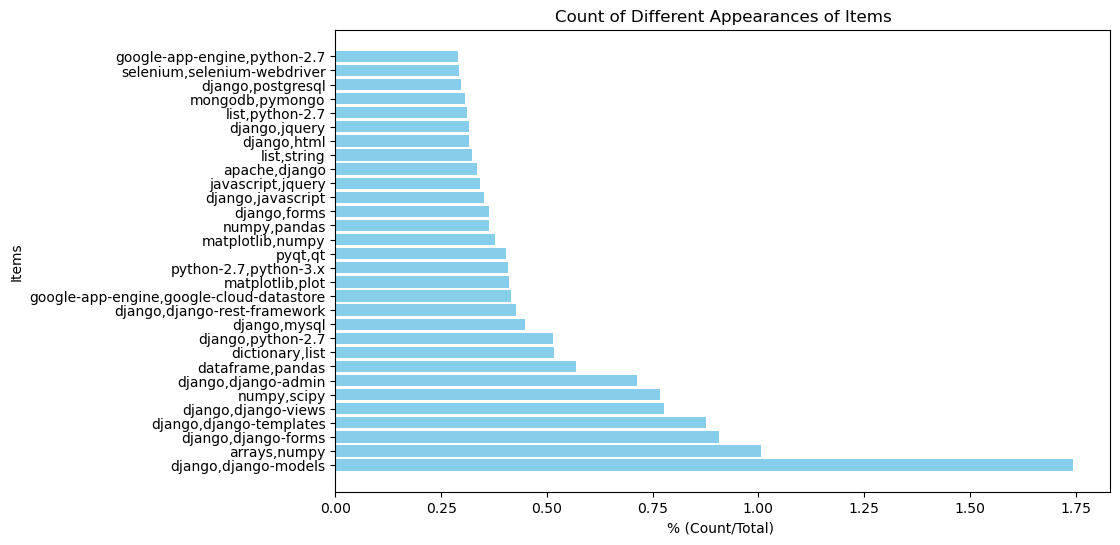

In [42]:
plot_items(itemsets_clean[2], percentage=True, percentile=50, top = 30)

# Network

In [3]:
flat_list_tuples = [item for sublist in TAGS for item in sublist]
from collections import Counter
# Counting occurrences of each item in the tuples
tag_counts = Counter(flat_list_tuples)

tag_counts

Counter({'xml': 4643,
         'macos': 5087,
         'fonts': 313,
         'photoshop': 28,
         'windows': 6132,
         'image': 2643,
         'pdf': 1058,
         'continuous-integration': 134,
         'extreme-programming': 1,
         'sql': 3432,
         'database': 3051,
         'oracle': 440,
         'cx-oracle': 315,
         'arrays': 7405,
         'iteration': 1065,
         'django': 67123,
         'view': 441,
         'oop': 2120,
         'mysql': 7077,
         'postgresql': 3371,
         'bpgsql': 1,
         'python-itertools': 708,
         'methods': 997,
         'monkeypatching': 180,
         'performance': 3364,
         'data-structures': 922,
         'graph-theory': 136,
         'syntax': 1224,
         'binary': 777,
         'integer': 676,
         'literals': 74,
         'protocol-buffers': 222,
         '': 36703,
         'operating-system': 448,
         'cross-platform': 331,
         'platform-agnostic': 1,
         'list': 16733,


In [4]:
len(tag_counts)

17858

In [4]:
import pickle
pickle.dump(tag_counts,open('./picklefiles/tag_counts.pickle', 'wb'))

In [5]:
import networkx as nx
# Creating a graph
G = nx.Graph()

# Adding nodes and edges based on the tuples
for id, items in TAGS.items():
    for i in range(len(items)):
        if not G.has_node(items[i]):
            G.add_node(items[i], counts=tag_counts[items[i]])  # Add each item as a node
        for j in range(i + 1, len(items)):
            G.add_edge(items[i], items[j])  # Add an edge between items in the same tuple

In [6]:
not_connected = [n for n in G.nodes() if G.degree(n) == 0]
len(not_connected)

235

In [7]:
not_connected = [n for n in G.nodes() if G.degree(n) == 0]
G.remove_nodes_from(not_connected)

## Basic Info

In [6]:
# Drawing the graph
# plt.figure(figsize=(12, 8))
# nx.draw(G, with_labels=False, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold')
# plt.title('Network Graph of Items in Tuples')
# plt.show()

In [58]:
def degree_distribution_plot(d1, label1, d2, label2, title="", n_bins = 100, cut = 10, figsize = (15,7), fig = None, ax = None):
    # Convert input lists to Python lists
    d1 = list(d1)
    if(d2 != None ):
        d2 = list(d2)

    # Create bins for the histogram using numpy's linspace function
    # The bins range from the minimum to the maximum of the combined d1 and d2 lists
    if(d2 != None ):
        bins = np.linspace(min(d1+d2), max(d1+d2), n_bins)
    else:
        bins = np.linspace(min(d1), max(d1), n_bins)
    
    # Use numpy's histogram function to calculate the frequency and bin edges for d1 and d2
    frq1, edges1 = np.histogram(a=d1, bins=bins)
    if(d2 != None ):
        frq2, edges2 = np.histogram(a=d2, bins=bins)

    # If no figure or axis is provided, create a new one
    if(fig == None and ax == None):
        fig, ax = plt.subplots(1, 1)

    # If a title is provided, set it as the figure's title
    if(title != ""):
        fig.suptitle(title, fontsize=16)

    # Set the figure's height and width
    fig.set_figheight(figsize[1])
    fig.set_figwidth(figsize[0])

    # Plot the histogram for d1 and d2
    ax.hist(edges1[:-1], n_bins, weights=frq1, label=label1, alpha = 0.7)
    if(d2 != None ):
        ax.hist(edges2[:-1], n_bins, weights=frq2, label=label2, alpha = 0.7)

    d1_scatter = [d for d in d1 if d > cut]
    ax.scatter(d1_scatter, [0.5]*len(d1_scatter), marker='+', color='tab:blue', alpha=0.7)

    if d2 != None:
        d2_scatter = [d for d in d2 if d > cut]
        ax.scatter(d2_scatter, [0.5]*len(d2_scatter), marker='x', color='tab:orange', alpha=0.7)

    
    # Set labels for the x and y axes
    ax.set_xlabel("k")
    ax.set_ylabel("count")

    # Add a legend to the plot
    ax.legend()

    # Hide the bottom spine of the plot
    ax.spines['bottom'].set_visible(False)

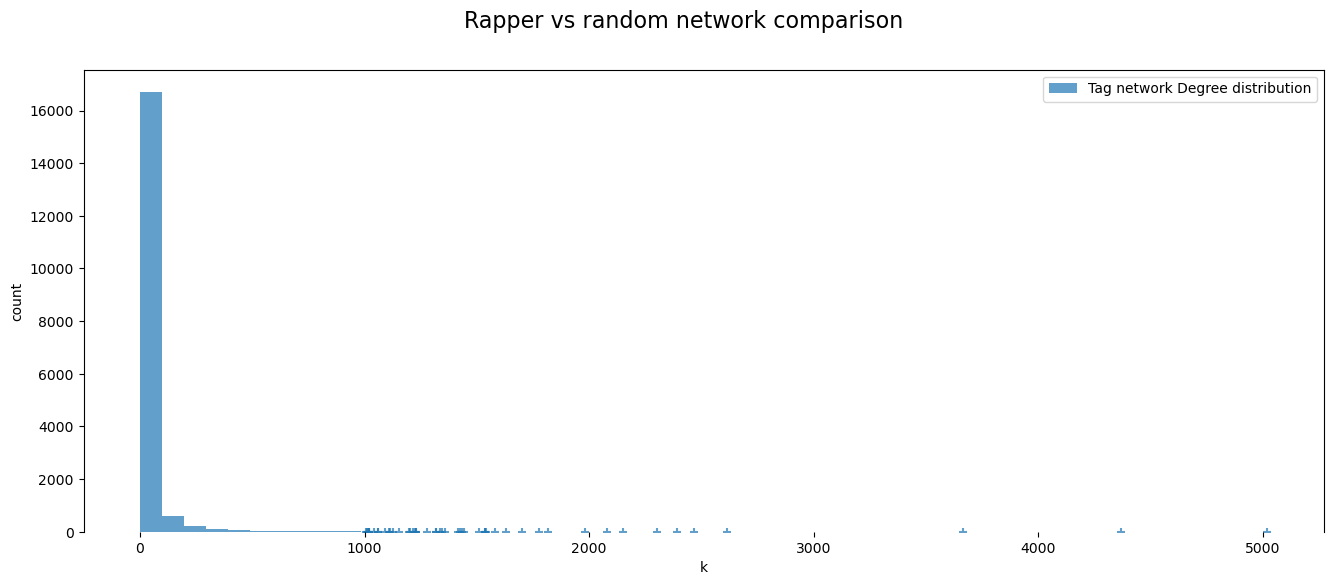

In [120]:
# Compare each plot
degree_distribution_plot(dict(G.degree).values(), "Tag network Degree distribution", 
    None, "",title='Rapper vs random network comparison', cut = 1000, n_bins=50, figsize=(16,6))

In [215]:
for i in range(10):
    print(f"Degree {i}: {sum(pd.Series(list(dict(G.degree()).values())) == i)}")

Degree 0: 0
Degree 1: 1166
Degree 2: 1854
Degree 3: 2321
Degree 4: 1485
Degree 5: 980
Degree 6: 909
Degree 7: 708
Degree 8: 557
Degree 9: 468


In [136]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

17623

In [25]:
import random

def select_random_nodes(G, size, seed = 42):
    # Selecting a random number of nodes from the graph
    num_nodes_to_select = size
    random.seed(seed)
    selected_nodes = random.sample(sorted(dict(G.nodes())), num_nodes_to_select)

    # Creating a subgraph with the selected nodes
    return G.subgraph(selected_nodes)

subG = select_random_nodes(G, 200)


# Getting the degrees of each node in the subgraph
node_degrees = dict(subG.degree())

# Adjusting the node size based on the degree (e.g., degree * 1000 for visibility)
node_sizes = [node_degrees[node] * 200 + 10 for node in subG.nodes()]

# # Drawing the subgraph
# plt.figure(figsize=(10, 6))
# pos = nx.kamada_kawai_layout(subG)
# nx.draw(subG, pos, with_labels=True, node_color='tab:blue', node_size=node_sizes, font_size=8)
# plt.title(f'Subgraph with {num_nodes_to_select} Randomly Selected Nodes')
# plt.show()

# import pickle
# pickle.dump(subG,open('./picklefiles/tags_subgraph.pickle', 'wb'))


In [ ]:
# pickle.dump(G,open('./picklefiles/tags_graph.pickle', 'wb'))

In [132]:
n_comp = [len(el) for el in nx.connected_components(G)]
n_comp = sorted(n_comp, reverse=True)

In [108]:
np.average(n_comp)*1775

4993.0

In [105]:
nx.number_connected_components(G)

1775

## Community detection

### Louvain

In [44]:
import networkx as nx
from networkx.algorithms.community import louvain_communities
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# graph = select_random_nodes(G, 2000, seed=42)
graph = G.subgraph(max(nx.connected_components(G), key=len))
# graph = select_random_nodes(graph, 2000, seed=42)

# Apply the Louvain community detection algorithm
communities = louvain_communities(graph, seed = 1234)

# Assigning a color to each community for visualization
community_colors = cm.rainbow(np.linspace(0, 1, len(communities)))

# Create a dictionary to assign a color to each node based on its community
node_colors = {}
for community_index, community_nodes in enumerate(communities):
    for node in community_nodes:
        node_colors[node] = community_colors[community_index]

print(f"Number of tags: {len(graph)}")
print(f"Number of communities: {len(communities)}")

Number of tags: 17591
Number of communities: 8


In [27]:
graph = select_random_nodes(graph, 2000, seed=42)

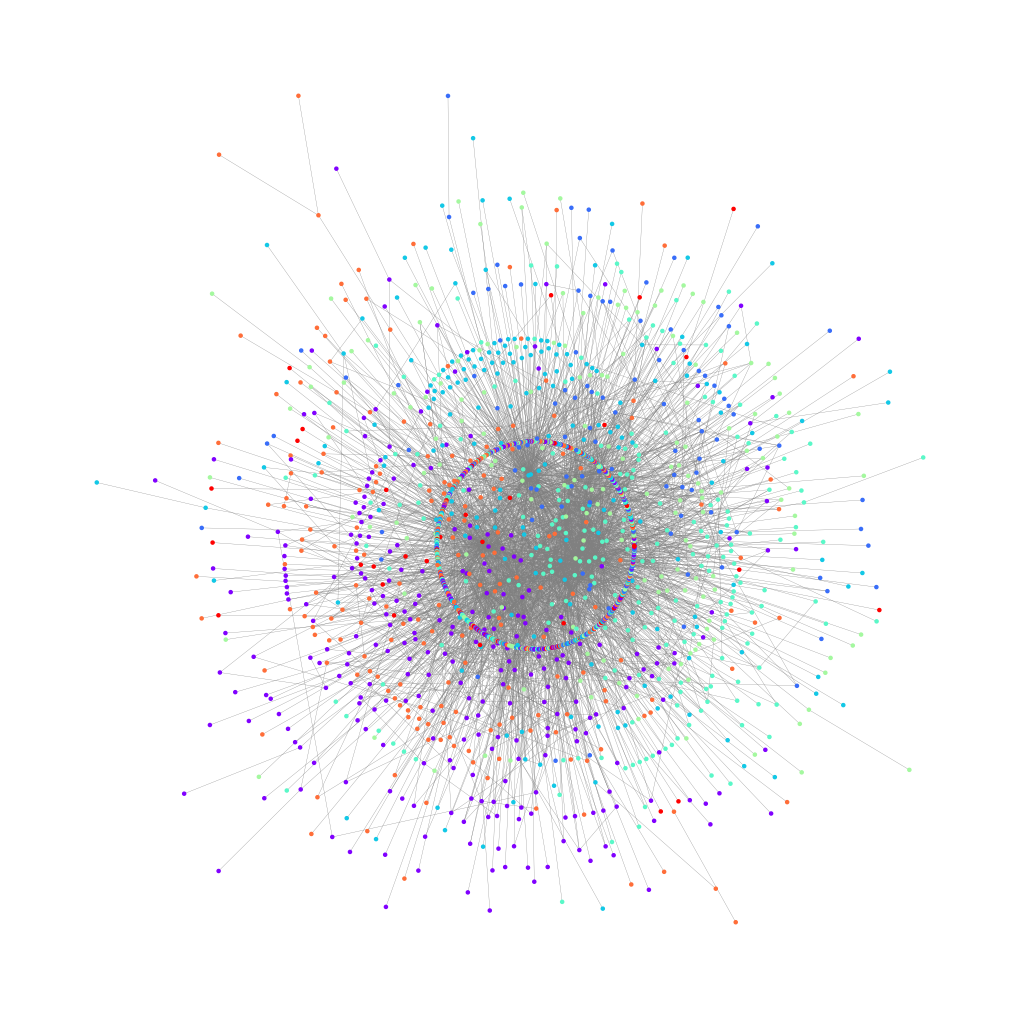

In [28]:
# Visualize the graph with community colors
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(graph)  # or use other layout algorithms like nx.kamada_kawai_layout
nx.draw(graph, pos, node_color=[node_colors[node] for node in graph.nodes()], 
        edge_color='gray', style='solid', with_labels=False, node_size=5, font_size=8, width=0.2)
plt.show()

In [12]:
communities

[{'sessionid',
  'intranet',
  'webdriverwait',
  'nsdictionary',
  'ie-mobile',
  'css-animations',
  'zend-mail',
  'spring-form',
  'jqueryform',
  'google-directions-api',
  'dropbox-api',
  'pyamf',
  'javascript-framework',
  'khan-academy',
  'twiki',
  'google-trends',
  'wapiti',
  'ofx',
  'hibernate',
  'sunburnt',
  'http-1.1',
  'user-generated-content',
  'webimage',
  'slug',
  'django-facebook',
  'wsgidav',
  'master-pages',
  'quickbooks',
  'system-setting',
  'xwiki',
  'wsgiserver',
  'ios-simulator',
  'database-caching',
  'google-contacts-api',
  'sencha-touch-2',
  'nsmutableurlrequest',
  'package.json',
  'validating',
  'extjs4',
  'django-suit',
  'quartz-scheduler',
  'modal-dialog',
  'template-inheritance',
  'onclick',
  'css',
  'google-profiles-api',
  'markup',
  'visitors',
  'x-editable',
  'service-accounts',
  'http-status-code-504',
  'xml-swf-charts',
  'flask-jwt',
  'hit',
  'emoji',
  'dajax',
  'email-attachments',
  'fckeditor',
  'twitch'

In [13]:
def find_word(in_list, element):
    return [i for i, el in enumerate(in_list) if element in el]

In [14]:
find_word(communities, 'django')

[0]

In [45]:
def process_communities(in_communities):
    out = []
    for comm in in_communities:
        l = set()
        for tag in comm:
            l.add((tag, tag_counts[tag]))
        out += [l]
    out = sorted(out, key=lambda l: sum([count for (_,count) in l]), reverse=True)
    out = [sorted(comm, key=lambda item: item[1], reverse=True) for comm in out ]
    return out

In [46]:
sorted_communities = process_communities(communities)

In [47]:
[len(comm) for comm in sorted_communities]

[2869, 3852, 3126, 3208, 1556, 2137, 838, 5]

In [48]:
sorted_communities[0]

[('python-3.x', 23827),
 ('list', 16733),
 ('pandas', 15209),
 ('regex', 12634),
 ('dictionary', 11204),
 ('string', 10007),
 ('arrays', 7405),
 ('csv', 6880),
 ('class', 4587),
 ('function', 4414),
 ('file', 4202),
 ('algorithm', 3985),
 ('parsing', 3788),
 ('loops', 3608),
 ('performance', 3364),
 ('datetime', 3349),
 ('sorting', 3068),
 ('for-loop', 3001),
 ('dataframe', 2335),
 ('recursion', 2267),
 ('excel', 2235),
 ('variables', 2202),
 ('exception', 2195),
 ('tuples', 2127),
 ('oop', 2120),
 ('file-io', 1969),
 ('if-statement', 1901),
 ('matrix', 1874),
 ('random', 1805),
 ('math', 1748),
 ('text', 1630),
 ('list-comprehension', 1570),
 ('indexing', 1535),
 ('inheritance', 1511),
 ('optimization', 1460),
 ('object', 1367),
 ('while-loop', 1352),
 ('split', 1334),
 ('search', 1279),
 ('pickle', 1251),
 ('input', 1249),
 ('time', 1235),
 ('syntax', 1224),
 ('decorator', 1224),
 ('generator', 1140),
 ('printing', 1092),
 ('python-2.x', 1088),
 ('date', 1073),
 ('replace', 1071),
 (

In [199]:
def find_word(in_list, element, strict = True):
    if strict:
        return [i for i, comm in enumerate(in_list) if element in [tag for (tag,_) in comm]]
    else:
        return [i for i, comm in enumerate(in_list) if any(element in tag for (tag, _) in comm)]

In [197]:
def find_word_and_container(in_list, element):
    return [(i, tag) for i, comm in enumerate(in_list) for tag, _ in comm if element in tag]


In [201]:
find_word(sorted_communities, 'numpy', strict=False)

[1, 3, 4]

In [202]:
find_word_and_container(sorted_communities, 'numpy')

[(1, 'numpy-slicing'),
 (1, 'numpy-ndarray'),
 (1, 'numpy-einsum'),
 (1, 'numpy-ufunc'),
 (3, 'numpydoc'),
 (4, 'numpy'),
 (4, 'numpy-memmap'),
 (4, 'numpy-stl')]

In [55]:
sorted_communities[0]

[('python-3.x', 23827),
 ('list', 16733),
 ('pandas', 15209),
 ('regex', 12634),
 ('dictionary', 11204),
 ('string', 10007),
 ('arrays', 7405),
 ('csv', 6880),
 ('class', 4587),
 ('function', 4414),
 ('file', 4202),
 ('algorithm', 3985),
 ('parsing', 3788),
 ('loops', 3608),
 ('performance', 3364),
 ('datetime', 3349),
 ('sorting', 3068),
 ('for-loop', 3001),
 ('dataframe', 2335),
 ('recursion', 2267),
 ('excel', 2235),
 ('variables', 2202),
 ('exception', 2195),
 ('tuples', 2127),
 ('oop', 2120),
 ('file-io', 1969),
 ('if-statement', 1901),
 ('matrix', 1874),
 ('random', 1805),
 ('math', 1748),
 ('text', 1630),
 ('list-comprehension', 1570),
 ('indexing', 1535),
 ('inheritance', 1511),
 ('optimization', 1460),
 ('object', 1367),
 ('while-loop', 1352),
 ('split', 1334),
 ('search', 1279),
 ('pickle', 1251),
 ('input', 1249),
 ('time', 1235),
 ('syntax', 1224),
 ('decorator', 1224),
 ('generator', 1140),
 ('printing', 1092),
 ('python-2.x', 1088),
 ('date', 1073),
 ('replace', 1071),
 (

In [159]:
pickle.dump(sorted_communities, open('/picklefiles/results.pkl', 'wb'))

### Spectral clustering

In [54]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import matplotlib.cm as cm

# graph = select_random_nodes(G, 2000, seed=42)
graph = G.subgraph(max(nx.connected_components(G), key=len))
# Convert the graph into an adjacency matrix
adj_matrix = nx.to_numpy_array(graph)
print("Spectral clustering starting...")
# Apply spectral clustering
sc = SpectralClustering(8, affinity='precomputed', n_init=100, assign_labels='kmeans')
sc.fit(adj_matrix)
print("Spectral clustering finished.")
# Assigning a color to each community for visualization
labels = sc.labels_



Spectral clustering starting...
Spectral clustering finished.


In [53]:
Counter(labels)

Counter({0: 17567, 2: 2, 3: 5, 5: 4, 1: 2, 6: 4, 4: 3, 7: 4})

In [128]:
community_colors = cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

graph_selection = select_random_nodes(graph, 2000, seed=42)

# Create a dictionary to assign a color to each node based on its community
node_colors = {node: community_colors[labels[i]] for i, node in enumerate(graph_selection.nodes())}

pos = nx.kamada_kawai_layout(graph_selection) # or use other layout algorithms like nx.kamada_kawai_layout

Plotting starting...


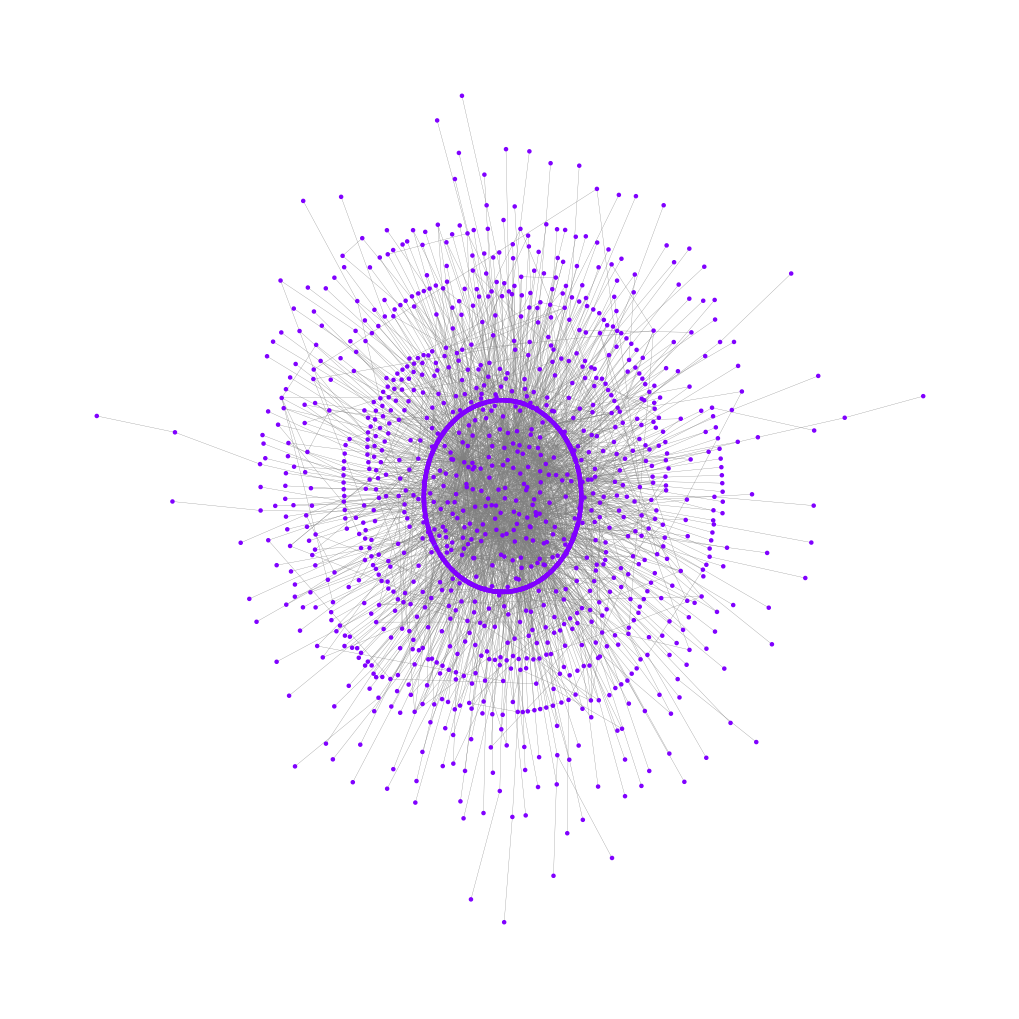

In [131]:
# Visualize the graph with community colors
plt.figure(figsize=(10, 10))
print("Plotting starting...")
nx.draw(graph_selection, pos, node_color=[node_colors[node] for node in graph_selection.nodes()], 
        edge_color='gray', style='solid', with_labels=False, node_size=5, font_size=8, width=0.2)
plt.show()

In [31]:
def get_community_elements(graph, labels, community):
    return list(np.array(graph.nodes())[np.array(labels == community)])

In [ ]:
labels

array([0, 0, 0, ..., 4, 3, 3], dtype=int64)

In [32]:
for i in range(0, len(np.unique(labels))):
    print(f"{i}: {len(get_community_elements(graph, labels, i))}")

0: 17527
1: 2
2: 6
3: 2
4: 3
5: 4
6: 5
7: 6
8: 32
9: 4


In [34]:
communities = [get_community_elements(graph, labels, i) for i in range(0, len(np.unique(labels)))]

In [41]:
sorted_communities = process_communities(communities)
sorted_communities

[[('django', 67123),
  ('python-2.7', 36016),
  ('python-3.x', 23827),
  ('numpy', 19223),
  ('list', 16733),
  ('pandas', 15209),
  ('google-app-engine', 12914),
  ('regex', 12634),
  ('matplotlib', 12316),
  ('dictionary', 11204),
  ('string', 10007),
  ('tkinter', 8801),
  ('flask', 8063),
  ('linux', 7532),
  ('javascript', 7441),
  ('arrays', 7405),
  ('mysql', 7077),
  ('html', 6982),
  ('django-models', 6930),
  ('csv', 6880),
  ('c++', 6593),
  ('json', 6369),
  ('windows', 6132),
  ('java', 5786),
  ('multithreading', 5591),
  ('scipy', 5483),
  ('sqlalchemy', 5373),
  ('macos', 5087),
  ('beautifulsoup', 4742),
  ('xml', 4643),
  ('class', 4587),
  ('wxpython', 4548),
  ('pyqt', 4516),
  ('function', 4414),
  ('php', 4213),
  ('file', 4202),
  ('pygame', 4198),
  ('algorithm', 3985),
  ('c', 3929),
  ('sockets', 3815),
  ('unicode', 3795),
  ('parsing', 3788),
  ('subprocess', 3716),
  ('selenium', 3713),
  ('scrapy', 3677),
  ('sqlite', 3667),
  ('django-forms', 3610),
  ('l

In [42]:
[len(comm) for comm in sorted_communities]

[17527, 32, 3, 6, 6, 5, 4, 4, 2, 2]

# Other

In [ ]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Girvan-Newman communities list
communities = list(nx.community.girvan_newman(graph))

# building initial dict of node_id to each possible subset:
node_id = 0
init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
for comm in communities:
    for subset in list(comm):
        if subset not in init_node2community_dict.values():
            node_id += 1
            init_node2community_dict[node_id] = subset

# turning this dictionary to the desired format in @mdml's answer
node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
    for node_id_parent, group in init_node2community_dict.items():
        if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
            node_id_to_children[node_id_parent].append(node_id1)
            node_id_to_children[node_id_parent].append(node_id2)

# also recording node_labels dict for the correct label for dendrogram leaves
node_labels = dict()
for node_id, group in init_node2community_dict.items():
    if len(group) == 1:
        node_labels[node_id] = list(group)[0]
    else:
        node_labels[node_id] = ''

# also needing a subset to rank dict to later know within all k-length merges which came first
subset_rank_dict = dict()
rank = 0
for e in communities[::-1]:
    for p in list(e):
        if tuple(p) not in subset_rank_dict:
            subset_rank_dict[tuple(sorted(p))] = rank
            rank += 1
subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

# finally using @mdml's magic, slightly modified:
G           = nx.DiGraph(node_id_to_children)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(node_id_to_children[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += node_id_to_children[v]
    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = node_id_to_children[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
        Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# dendrogram
plt.figure()
dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
plt.savefig('dendrogram.png')

In [209]:
from networkx.algorithms import community
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# subG = select_random_nodes(G, 5000)


# Using the Louvain method for community detection to identify clusters
# This method is widely used for its efficiency and effectiveness in detecting communities in large networks

# partition = community.louvain_partitions(subG, resolution=1)

full_communities_generator = community.girvan_newman(graph)

In [216]:
list(full_communities_generator)

In [212]:
full_top_level_communities = next(full_communities_generator)

# Counting the number of communities detected in the full graph
num_full_communities = len(full_top_level_communities)
num_full_communities

823

In [ ]:
# Assigning a color to each community for visualization
community_colors = cm.rainbow(np.linspace(0, 1, len(partition)))

# Creating a dictionary for node colors
node_colors = {}

for community_index, community_nodes in enumerate(partition):
    for node in community_nodes:
        # Assigning the color to the node in the dictionary
        node_colors[node] = community_colors[community_index]

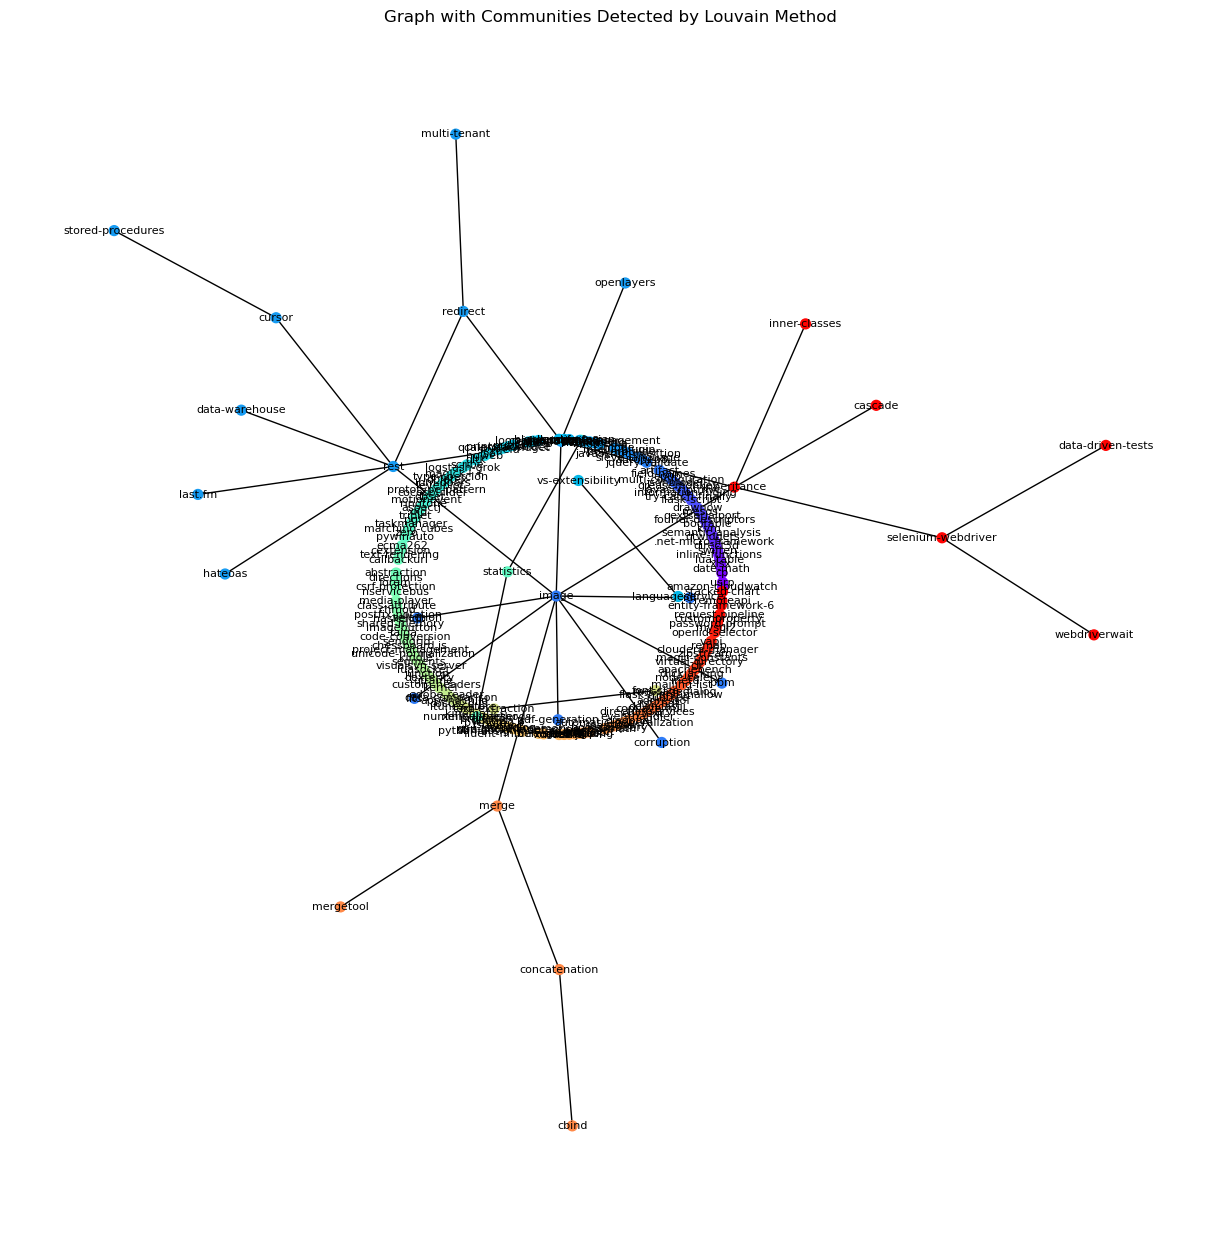

In [ ]:
# Visualizing the graph with communities
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(subG)
nx.draw(subG, pos, node_color=[ node_colors[node] for node in subG], with_labels=True, node_size=50, font_size=8)
plt.title("Graph with Communities Detected by Louvain Method")
plt.show()